
APPLYING TUNA MEDIUM TO MEMORY DATA
🔬 Parameters: 30% threshold, 2-min windows, 25% penalty, 50/50 blending

📊 Processing Memory Utilization with TUNA Medium:
  🔍 CPU STRESS:
    ✅ TUNA-Medium-Memory: 0 unstable periods, 22.7% noise reduction, 1 features
  🔍 BASELINE:
    ✅ TUNA-Medium-Memory: 0 unstable periods, 21.0% noise reduction, 1 features

📊 Processing Memory Cache with TUNA Medium:
  🔍 CPU STRESS:
    ✅ TUNA-Medium-Memory: 0 unstable periods, 25.0% noise reduction, 1 features
  🔍 BASELINE:
    ✅ TUNA-Medium-Memory: 0 unstable periods, 25.0% noise reduction, 1 features

📊 Processing Memory Available with TUNA Medium:
  🔍 CPU STRESS:
    ✅ TUNA-Medium-Memory: 0 unstable periods, 26.3% noise reduction, 1 features
  🔍 BASELINE:
    ✅ TUNA-Medium-Memory: 0 unstable periods, 28.8% noise reduction, 1 features

COMPREHENSIVE MEMORY CPU STRESS ANALYSIS - TUNA MEDIUM

🔄 Analyzing Memory Utilization...

📊 Plotting TUNA Medium cleaned memory data for Memory Utilization...


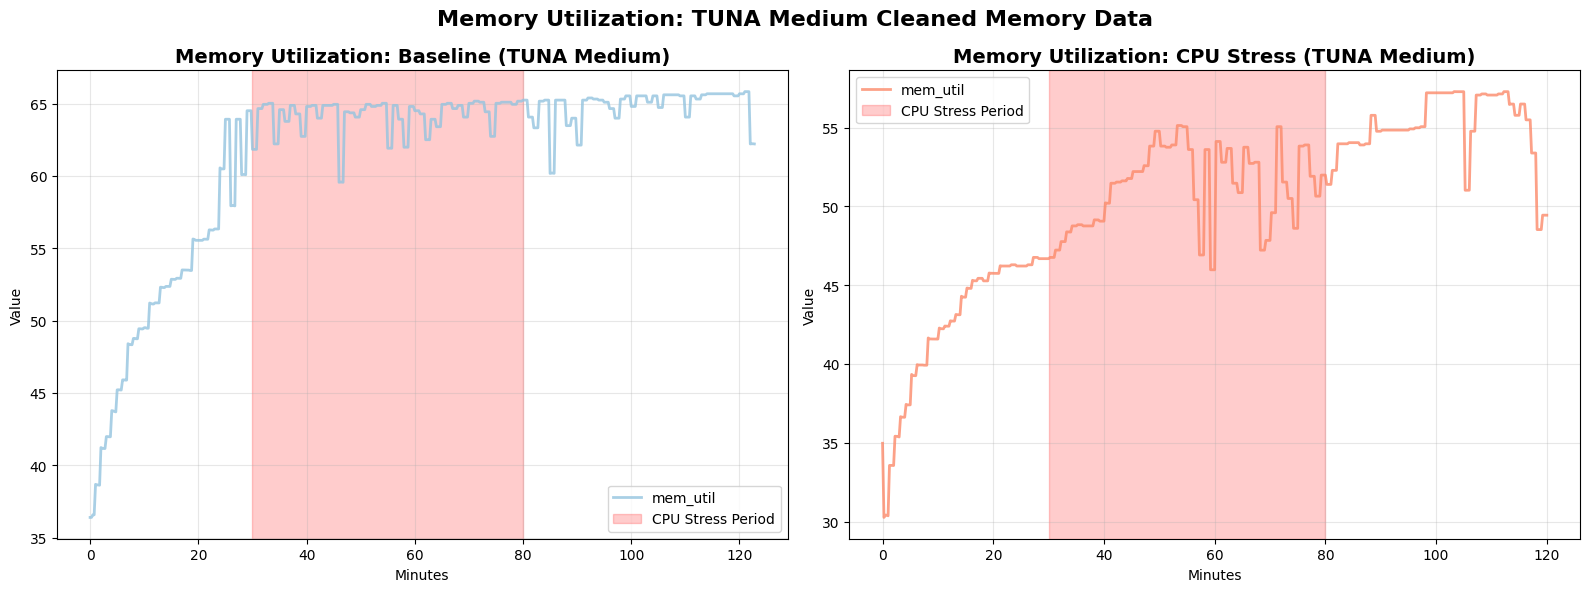

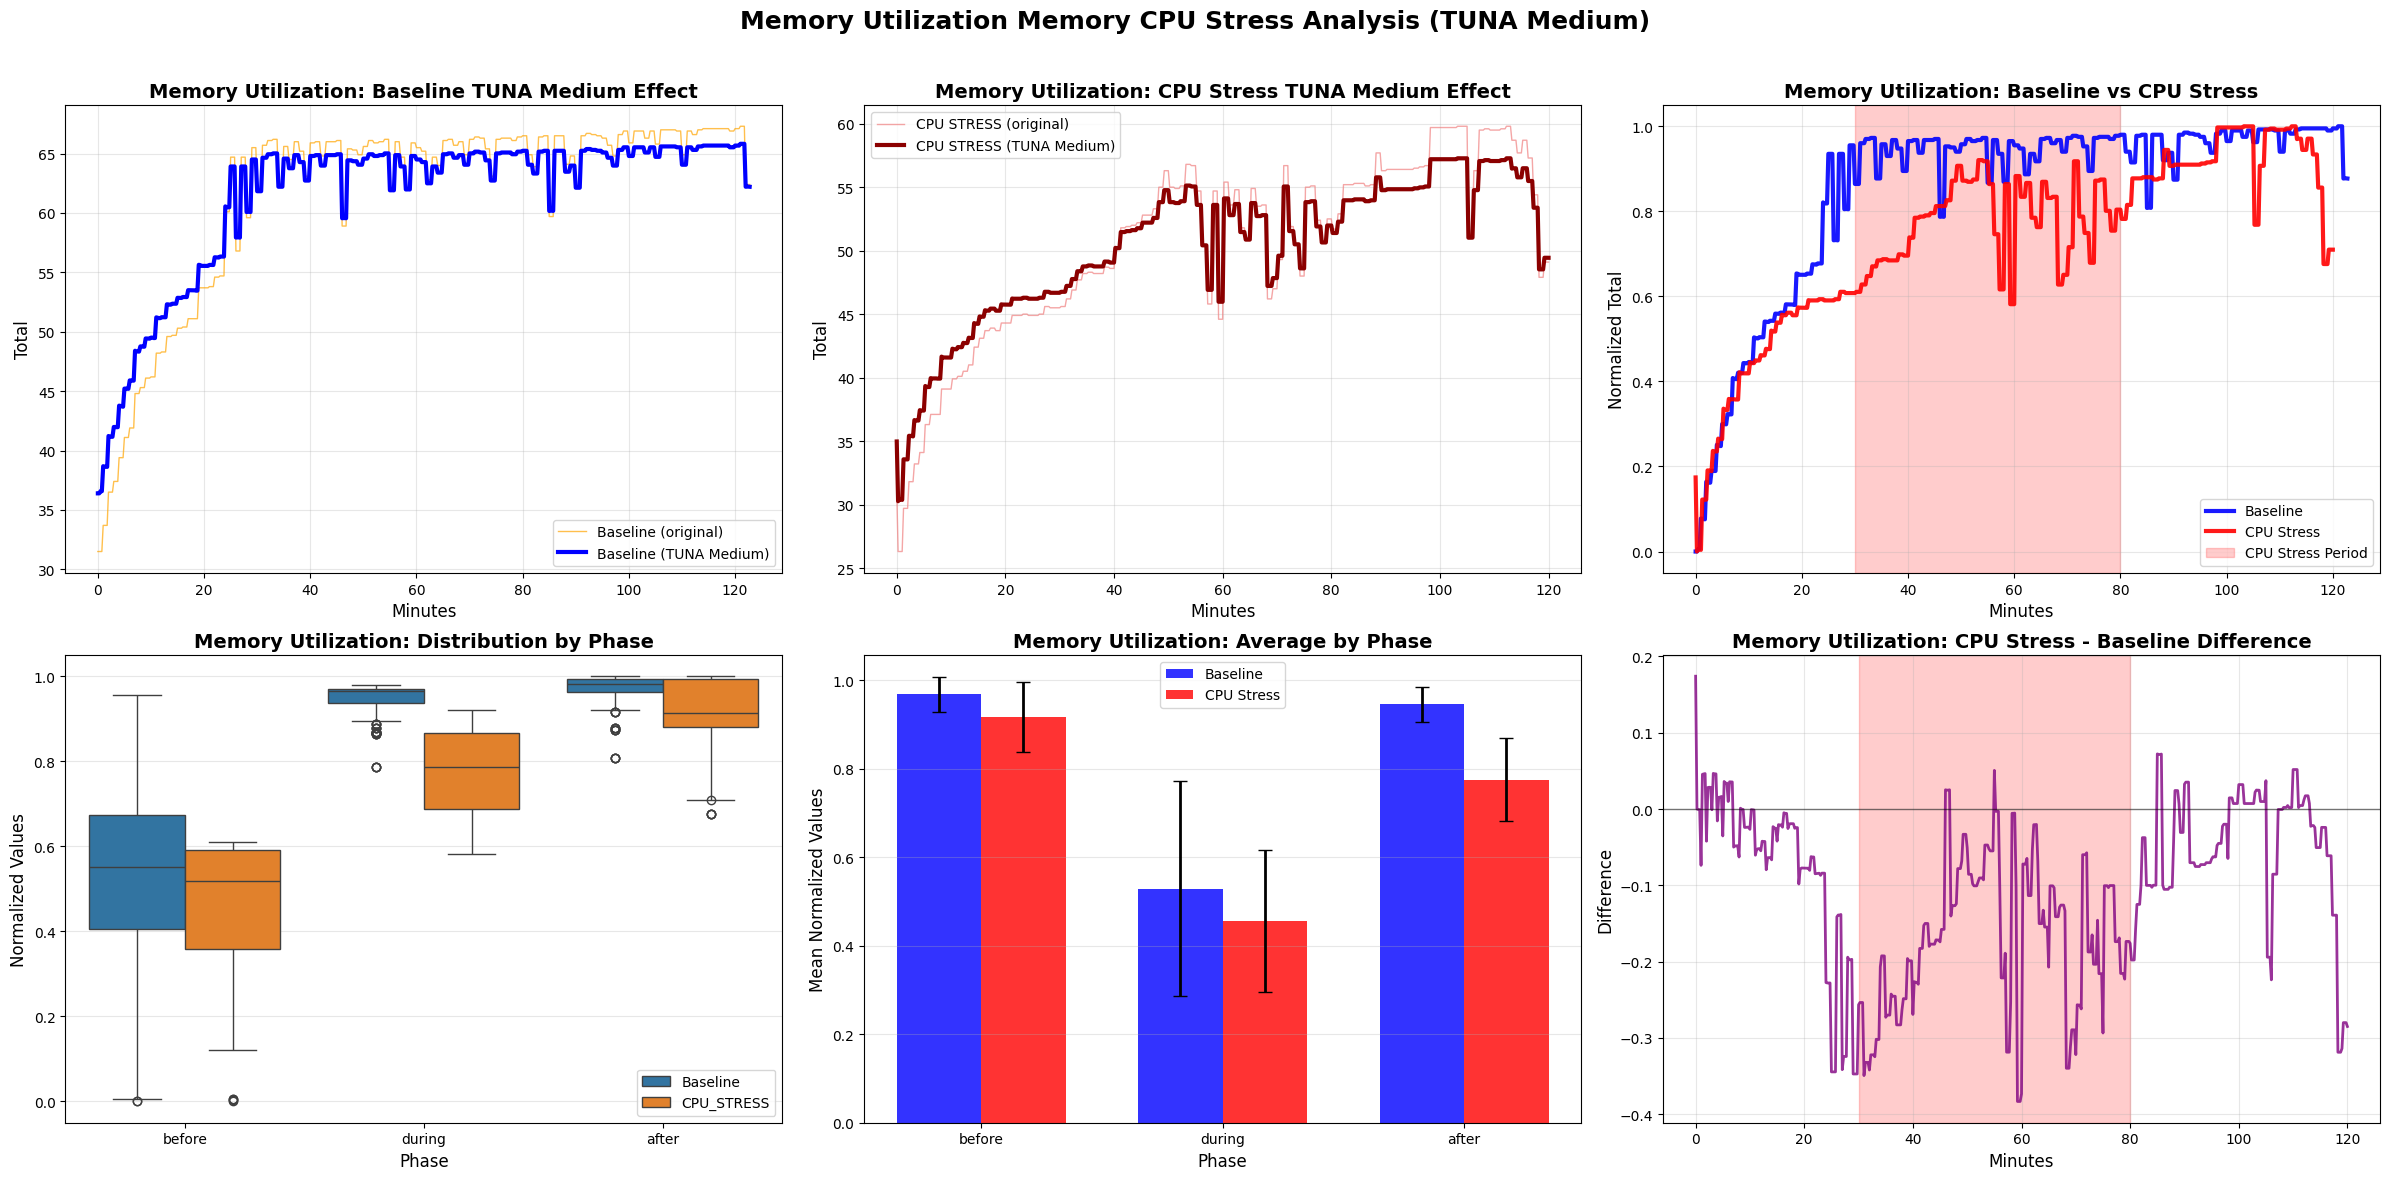


MEMORY UTILIZATION - TUNA MEDIUM ANALYSIS RESULTS

🔧 TUNA MEDIUM CLEANING SUMMARY:
  CPU STRESS: 0 unstable periods, 22.7% noise reduction
  BASELINE:   0 unstable periods, 21.0% noise reduction
  METHOD:     TUNA-Medium-Memory

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9685  0.0389  0.8079  1.0000
before  0.5293  0.2430  0.0000  0.9552
during  0.9458  0.0388  0.7871  0.9801

📊 CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9174  0.0800  0.6760  1.0000
before  0.4559  0.1612  0.0000  0.6107
during  0.7761  0.0941  0.5816  0.9204

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  2.76, p=  0.0063 (✅ SIGNIFICANT)
  DURING  : t= 23.65, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t=  7.47, p=  0.0000 (✅ SIGNIFICANT)

📈 CPU STRESS IMPACT ON MEMORY (% CHANGE):
  BEFORE  :  -13.87% (↘️ DECREASE)
  DURING  :  -17.95% (↘️ DECREASE)
  AFTER   :   -5.2

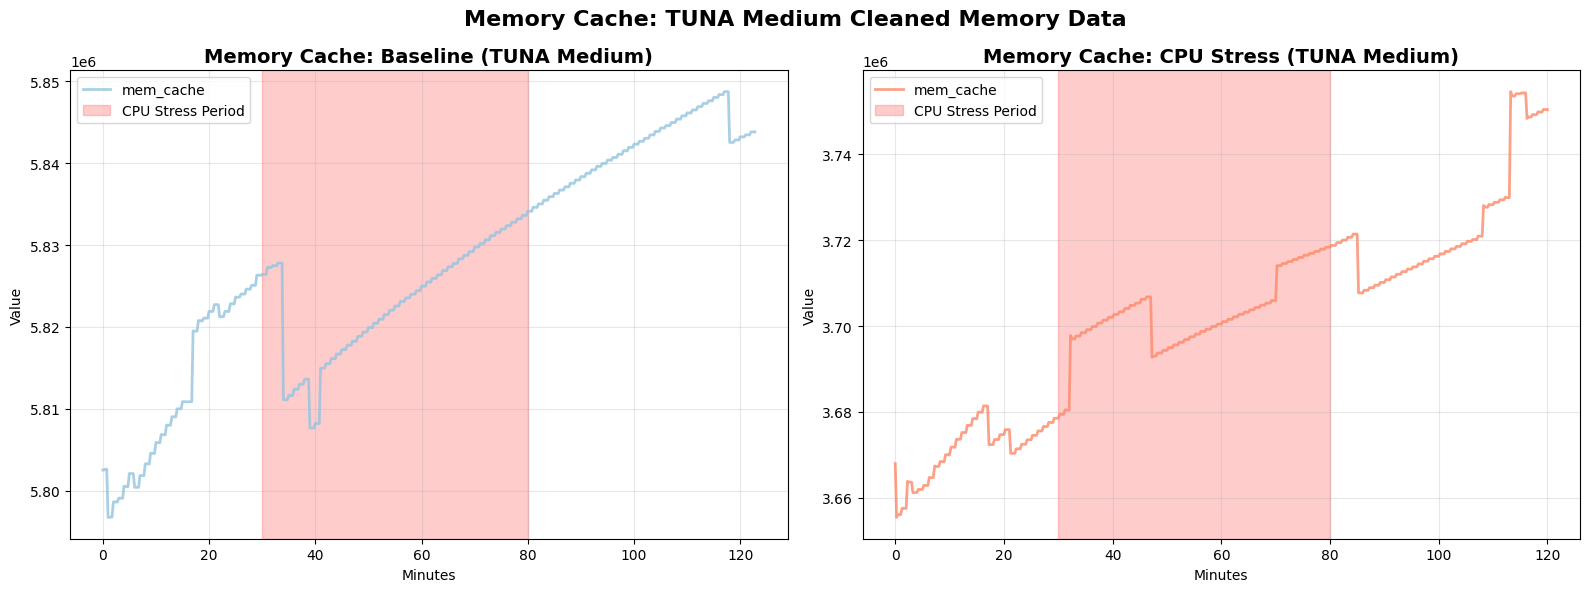

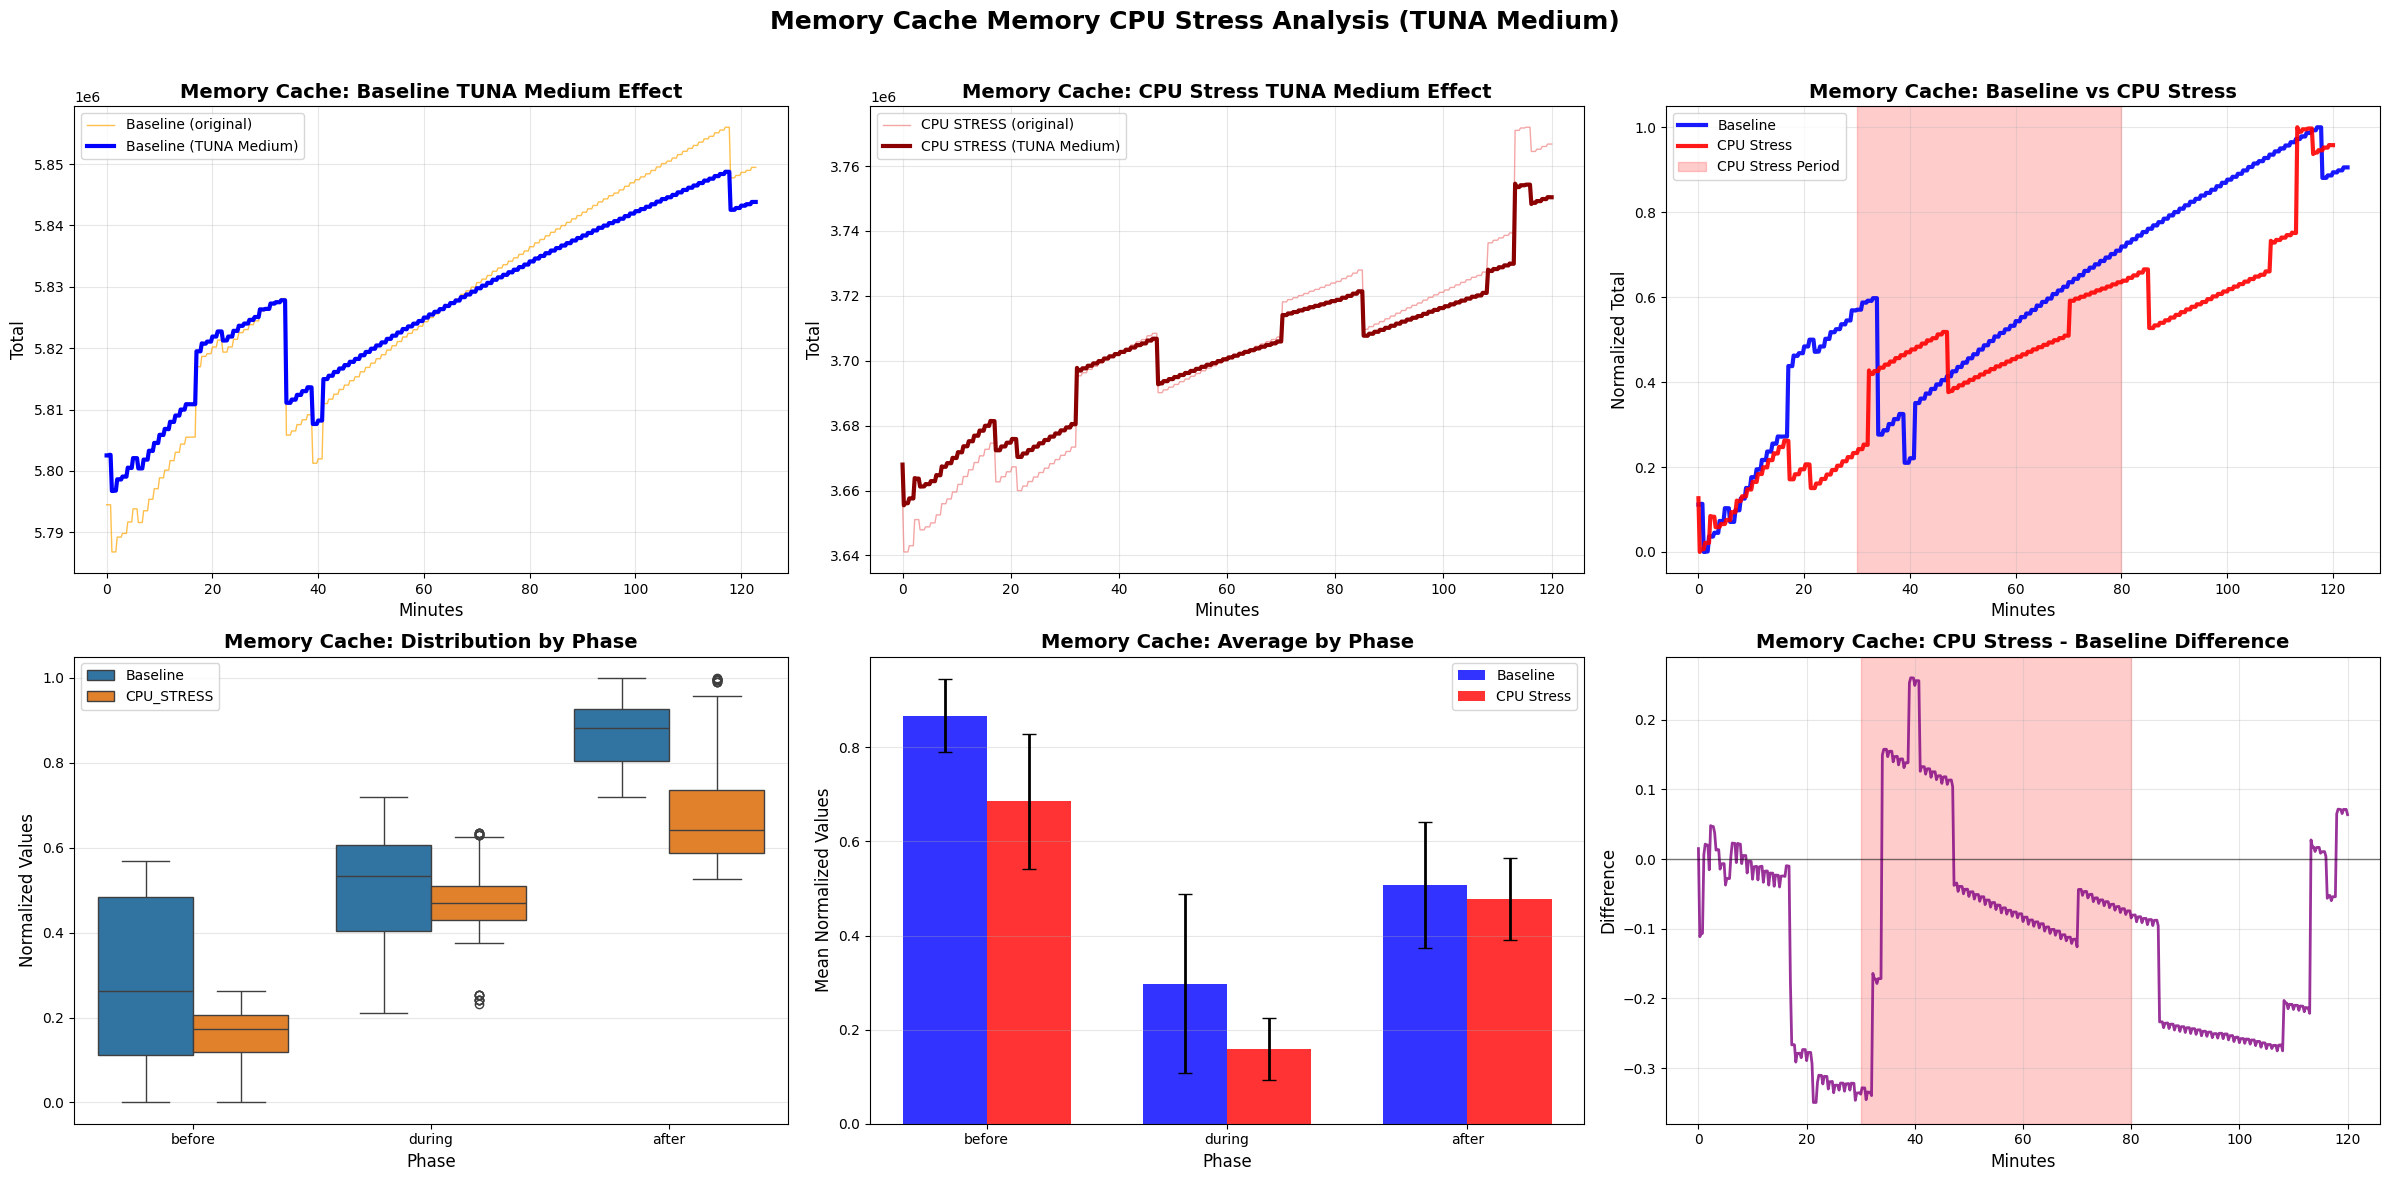


MEMORY CACHE - TUNA MEDIUM ANALYSIS RESULTS

🔧 TUNA MEDIUM CLEANING SUMMARY:
  CPU STRESS: 0 unstable periods, 25.0% noise reduction
  BASELINE:   0 unstable periods, 25.0% noise reduction
  METHOD:     TUNA-Medium-Memory

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8677  0.0781  0.7188  1.0000
before  0.2979  0.1900  0.0000  0.5690
during  0.5069  0.1343  0.2099  0.7193

📊 CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6853  0.1431  0.5271  1.0000
before  0.1588  0.0660  0.0000  0.2623
during  0.4776  0.0871  0.2329  0.6349

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  7.57, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t=  2.60, p=  0.0097 (✅ SIGNIFICANT)
  AFTER   : t= 14.52, p=  0.0000 (✅ SIGNIFICANT)

📈 CPU STRESS IMPACT ON MEMORY (% CHANGE):
  BEFORE  :  -46.69% (↘️ DECREASE)
  DURING  :   -5.79% (↘️ DECREASE)
  AFTER   :  -21.02% (↘️

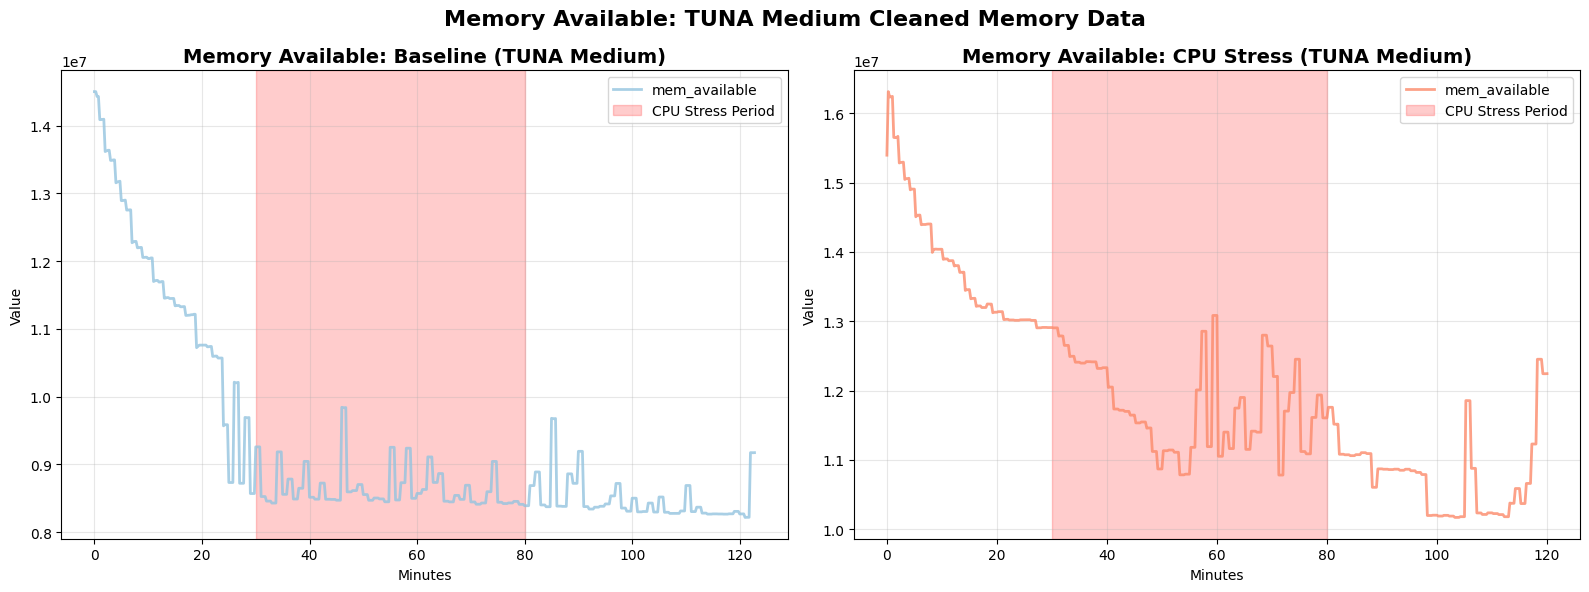

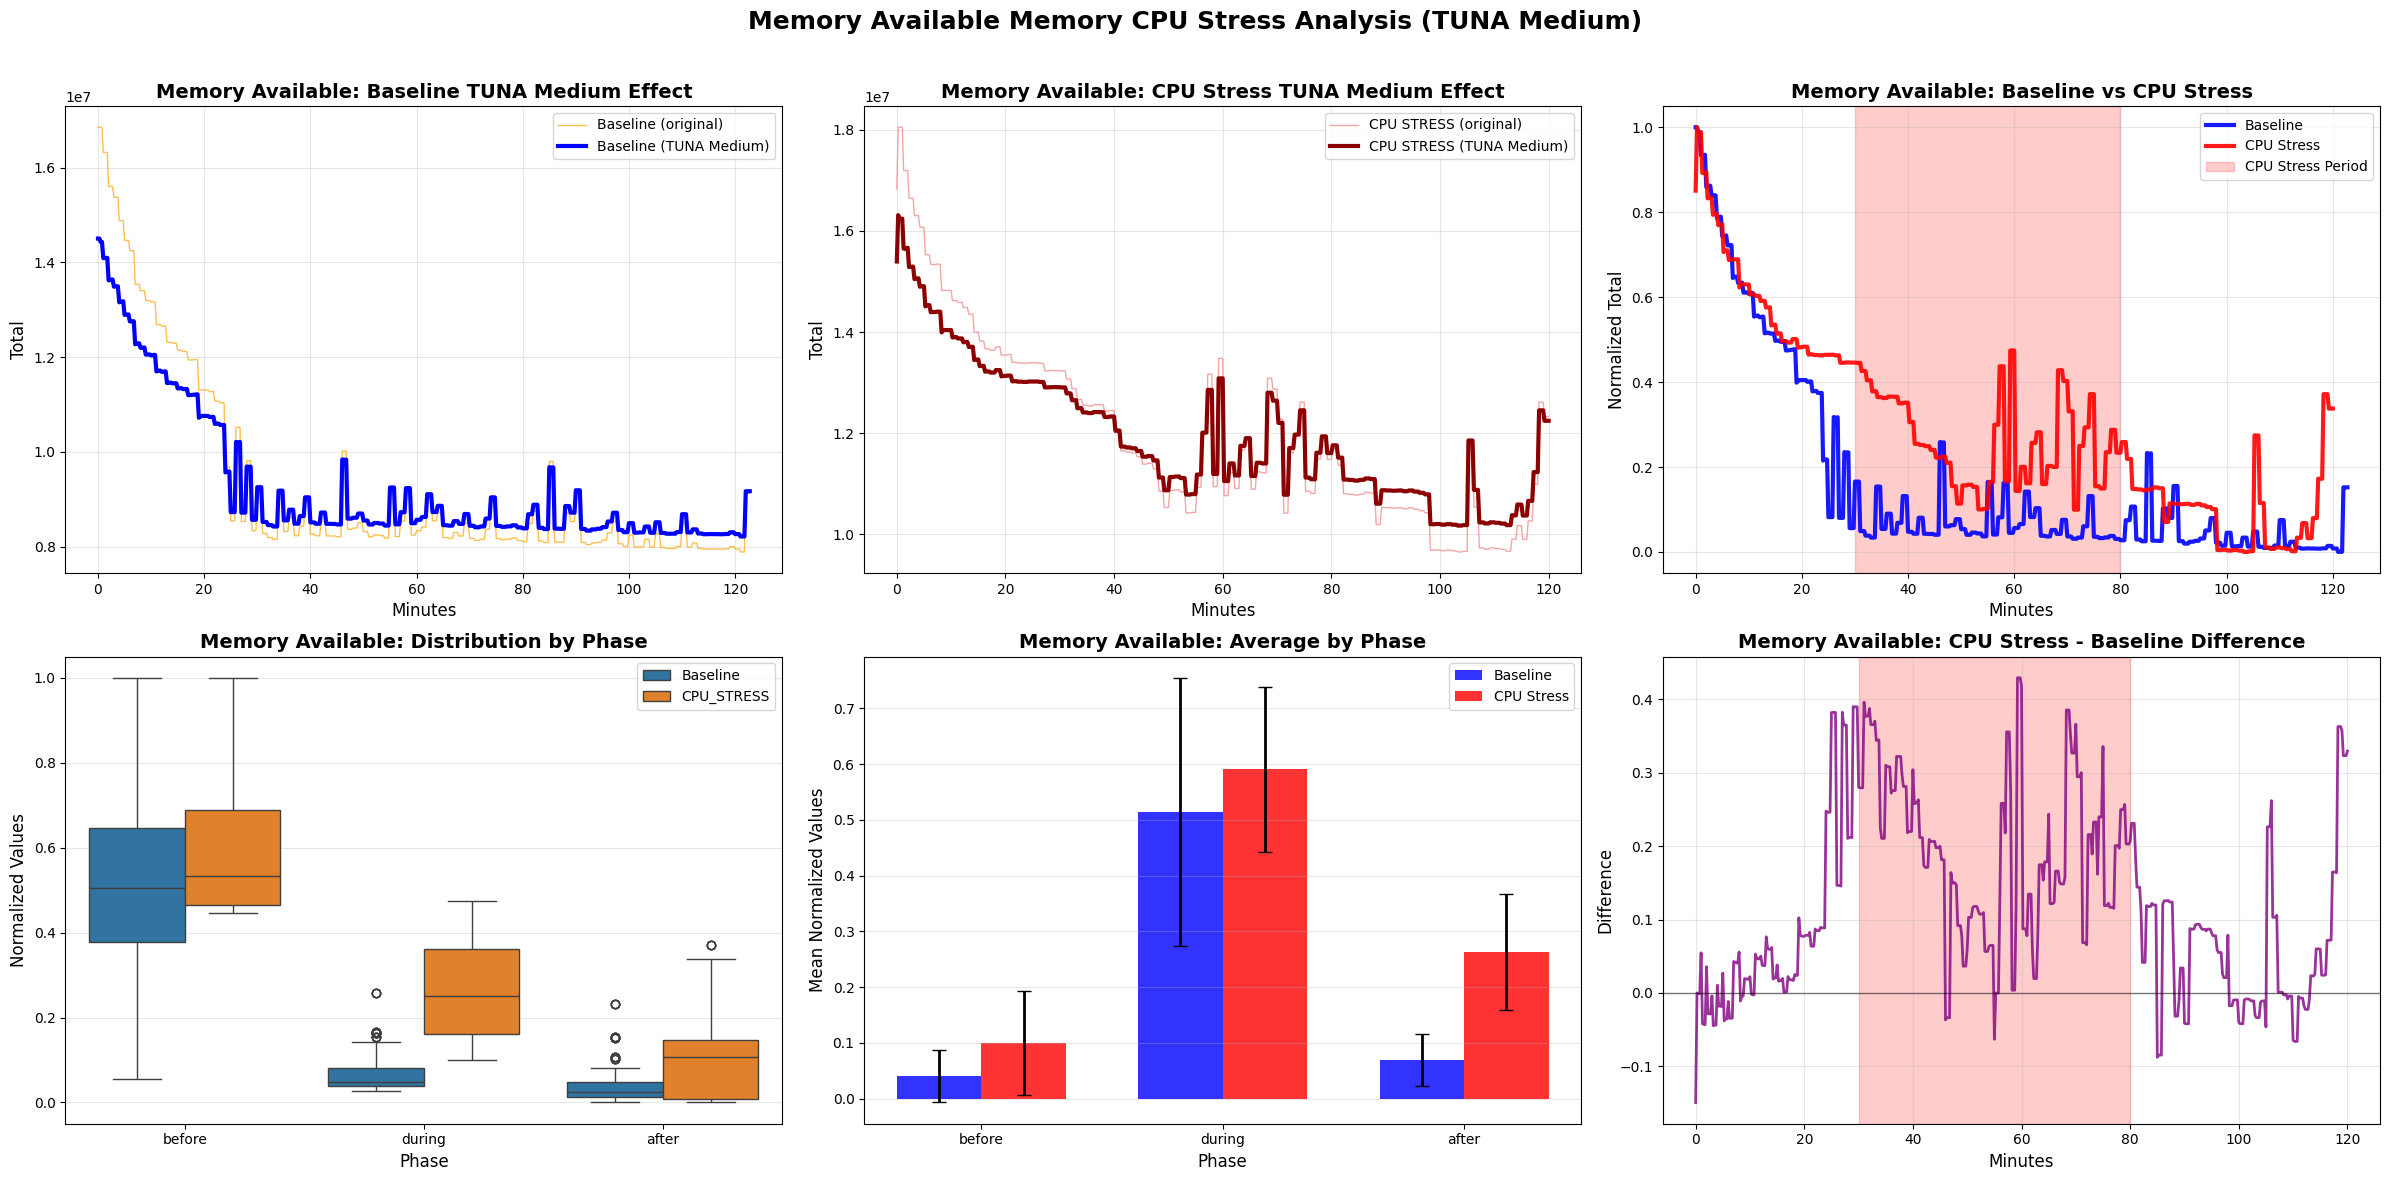


MEMORY AVAILABLE - TUNA MEDIUM ANALYSIS RESULTS

🔧 TUNA MEDIUM CLEANING SUMMARY:
  CPU STRESS: 0 unstable periods, 26.3% noise reduction
  BASELINE:   0 unstable periods, 28.8% noise reduction
  METHOD:     TUNA-Medium-Memory

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0403  0.0474  0.0000  0.2327
before  0.5138  0.2409  0.0561  1.0000
during  0.0689  0.0471  0.0275  0.2586

📊 CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0996  0.0936  0.0000  0.3715
before  0.5910  0.1480  0.4452  1.0000
during  0.2628  0.1047  0.0995  0.4744

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -2.99, p=  0.0031 (✅ SIGNIFICANT)
  DURING  : t=-23.95, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t= -7.34, p=  0.0000 (✅ SIGNIFICANT)

📈 CPU STRESS IMPACT ON MEMORY (% CHANGE):
  BEFORE  :  +15.01% (↗️ INCREASE)
  DURING  : +281.42% (↗️ INCREASE)
  AFTER   : +147.02%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load all memory datasets
df_mem_util = pd.read_csv("mem_util.csv")
df_mem_cache = pd.read_csv("mem_cache.csv")
df_mem_available = pd.read_csv("mem_available.csv")

df_baseline_mem_util = pd.read_csv("../../baseline/memory related/mem_util.csv")
df_baseline_mem_cache = pd.read_csv("../../baseline/memory related/mem_cache.csv")
df_baseline_mem_available = pd.read_csv("../../baseline/memory related/mem_available.csv")

# Add source labels for CPU STRESS experiment
df_mem_util["source"] = "CPU_STRESS"
df_mem_cache["source"] = "CPU_STRESS"
df_mem_available["source"] = "CPU_STRESS"

df_baseline_mem_util["source"] = "BASELINE"
df_baseline_mem_cache["source"] = "BASELINE"
df_baseline_mem_available["source"] = "BASELINE"

# Convert to datetime
df_mem_util["Time"] = pd.to_datetime(df_mem_util["Time"])
df_mem_cache["Time"] = pd.to_datetime(df_mem_cache["Time"])
df_mem_available["Time"] = pd.to_datetime(df_mem_available["Time"])

df_baseline_mem_util["Time"] = pd.to_datetime(df_baseline_mem_util["Time"])
df_baseline_mem_cache["Time"] = pd.to_datetime(df_baseline_mem_cache["Time"])
df_baseline_mem_available["Time"] = pd.to_datetime(df_baseline_mem_available["Time"])

delay = 30
duration = 50

# Synchronize test datasets with baseline timeline
time_offset = df_baseline_mem_util["Time"].min() - df_mem_util["Time"].min()
df_mem_util["Time"] += time_offset
df_mem_cache["Time"] += time_offset
df_mem_available["Time"] += time_offset

# Convert timeline to minutes
all_dfs = [
    df_mem_util, df_mem_cache, df_mem_available,
    df_baseline_mem_util, df_baseline_mem_cache, df_baseline_mem_available
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# STORE ORIGINAL DATASETS BEFORE CLEANING
original_datasets = {
    'Memory Utilization': {'cpu_stress': df_mem_util.copy(), 'baseline': df_baseline_mem_util.copy()},
    'Memory Cache': {'cpu_stress': df_mem_cache.copy(), 'baseline': df_baseline_mem_cache.copy()},
    'Memory Available': {'cpu_stress': df_mem_available.copy(), 'baseline': df_baseline_mem_available.copy()}
}

# TUNA MEDIUM IMPLEMENTATION FOR MEMORY DATA
def apply_tuna_cleaning_medium_memory(df):
    """
    TUNA Medium for memory data with adjusted parameters for memory characteristics
    - 30% relative range threshold (paper)
    - 2-minute windows (paper)  
    - 25% penalty (medium - gentler than paper's 50%)
    - 50% original + 50% corrected blending
    """
    df_result = df.copy()
    
    # Get numeric columns (exclude Time, Minutes, source columns)
    numeric_cols = [col for col in df.columns 
                   if col not in ['Time', 'Minutes', 'source', 'Phase'] and 
                   df[col].dtype in ['int64', 'float64']]
    outlier_stats = {}
    
    if len(numeric_cols) == 0:
        return df_result, outlier_stats
    
    # For memory data, create Total_Memory from all numeric columns (typically single column)
    if len(numeric_cols) == 1:
        df_result['Total_Memory'] = df_result[numeric_cols[0]]
    else:
        df_result['Total_Memory'] = df_result[numeric_cols].sum(axis=1)
    
    # STEP 1: Outlier detection and correction
    outliers_detected = 0
    
    if 'Time' in df.columns:
        df_result['Time'] = pd.to_datetime(df_result['Time'])
        df_result.set_index('Time', inplace=True)
        
        grouped = df_result.groupby(pd.Grouper(freq='2min'))
        
        for name, group in grouped:
            if len(group) < 2:
                continue
                
            values = group['Total_Memory'].values
            if len(values) > 1 and np.mean(values) > 0:
                relative_range = (np.max(values) - np.min(values)) / np.mean(values)
                
                if relative_range > 0.30:
                    correction_factor = 0.75  # 25% penalty
                    df_result.loc[group.index, 'Total_Memory'] *= correction_factor
                    for col in numeric_cols:
                        df_result.loc[group.index, col] *= correction_factor
                    outliers_detected += 1
        
        df_result.reset_index(inplace=True)
    
    # STEP 2: Noise modeling (adapted for memory data)
    noise_reduction = 0
    
    if len(df_result) >= 20:
        try:
            feature_df = df_result.copy()
            
            # For memory, we typically have single metrics, so create meaningful features
            if len(numeric_cols) == 1:
                # Create features from time-based patterns for single-column memory data
                feature_df['Memory_Rolling_Mean'] = feature_df['Total_Memory'].rolling(window=5, min_periods=1).mean()
                feature_df['Memory_Rolling_Std'] = feature_df['Total_Memory'].rolling(window=5, min_periods=1).std()
                feature_df['Memory_Trend'] = feature_df['Total_Memory'].diff().fillna(0)
                
                feature_columns = ['Total_Memory', 'Memory_Rolling_Mean', 'Memory_Rolling_Std', 'Memory_Trend']
            else:
                # For multi-column memory data
                feature_df['Memory_Mean'] = feature_df[numeric_cols].mean(axis=1)
                feature_df['Memory_Std'] = feature_df[numeric_cols].std(axis=1)
                feature_df['Memory_Max'] = feature_df[numeric_cols].max(axis=1)
                feature_df['Memory_Min'] = feature_df[numeric_cols].min(axis=1)
                feature_df['Memory_Range'] = feature_df['Memory_Max'] - feature_df['Memory_Min']
                
                feature_columns = numeric_cols + ['Memory_Mean', 'Memory_Std', 'Memory_Max', 'Memory_Min', 'Memory_Range']
            
            # Add time-based features
            if 'Time' in df.columns:
                feature_df['Hour'] = pd.to_datetime(feature_df['Time']).dt.hour
                feature_df['Minute'] = pd.to_datetime(feature_df['Time']).dt.minute
                feature_columns.extend(['Hour', 'Minute'])
            
            target_mean = feature_df['Total_Memory'].mean()
            if target_mean > 0:
                feature_df['target'] = (feature_df['Total_Memory'] / target_mean) - 1
                
                clean_data = feature_df[feature_columns + ['target']].dropna()
                
                if len(clean_data) >= 10:
                    X = clean_data[feature_columns]
                    y = clean_data['target']
                    
                    scaler = StandardScaler()
                    X_scaled = scaler.fit_transform(X)
                    
                    model = RandomForestRegressor(
                        n_estimators=100,
                        random_state=42,
                        n_jobs=-1
                    )
                    model.fit(X_scaled, y)
                    
                    feature_matrix = feature_df[feature_columns].fillna(method='ffill').fillna(method='bfill').fillna(0)
                    X_pred_scaled = scaler.transform(feature_matrix)
                    predicted_error = model.predict(X_pred_scaled)
                    
                    original_std = df_result['Total_Memory'].std()
                    corrected_values = df_result['Total_Memory'] / (predicted_error * 0.5 + 1)
                    
                    # Blend 50% original + 50% corrected
                    df_result['Total_Memory'] = 0.5 * df_result['Total_Memory'] + 0.5 * corrected_values
                    
                    cleaned_std = df_result['Total_Memory'].std()
                    noise_reduction = ((original_std - cleaned_std) / original_std) * 100
                    
                    # Proportionally adjust individual memory columns
                    if len(numeric_cols) == 1:
                        df_result[numeric_cols[0]] = df_result['Total_Memory']
                    else:
                        total_original = df_result[numeric_cols].sum(axis=1)
                        adjustment_ratio = df_result['Total_Memory'] / (total_original + 0.001)
                        for col in numeric_cols:
                            df_result[col] = df_result[col] * adjustment_ratio
        
        except Exception as e:
            print(f"    ⚠️  Memory noise modeling failed: {e}")
    
    outlier_stats['_summary'] = {
        'total_outliers': outliers_detected,
        'method': 'TUNA-Medium-Memory',
        'relative_threshold': 0.30,
        'time_window': '2min',
        'correction_penalty': 0.25,
        'noise_blending': '50% original + 50% corrected',
        'always_applied': True,
        'noise_reduction': noise_reduction,
        'features_used': len(numeric_cols)
    }
    
    return df_result, outlier_stats

# OUTLIER CLEANING WITH TUNA MEDIUM
datasets_clean = {}
all_outlier_stats = {}

print(f"\n{'='*80}")
print("APPLYING TUNA MEDIUM TO MEMORY DATA")
print(f"{'='*80}")
print("🔬 Parameters: 30% threshold, 2-min windows, 25% penalty, 50/50 blending")
print(f"{'='*80}")

for dataset_name, dataset_pair in original_datasets.items():
    print(f"\n📊 Processing {dataset_name} with TUNA Medium:")
    
    datasets_clean[dataset_name] = {}
    all_outlier_stats[dataset_name] = {}
    
    for source_type, df in dataset_pair.items():
        print(f"  🔍 {source_type.upper().replace('_', ' ')}:")
        
        # Apply TUNA Medium memory cleaning
        df_clean, stats = apply_tuna_cleaning_medium_memory(df)
        
        datasets_clean[dataset_name][source_type] = df_clean
        all_outlier_stats[dataset_name][source_type] = stats
        
        # Print TUNA summary
        total_outliers = stats['_summary']['total_outliers']
        noise_reduction = stats['_summary']['noise_reduction']
        method = stats['_summary']['method']
        features_used = stats['_summary']['features_used']
        print(f"    ✅ {method}: {total_outliers} unstable periods, {noise_reduction:.1f}% noise reduction, {features_used} features")

# NORMALIZATION FUNCTION
def normalize_df_memory(df, columns):
    result = df.copy()
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:  
            result[col] = (df[col] - min_val) / (max_val - min_val)
        else:
            result[col] = 0
    return result

# ADD PHASE COLUMN 
def add_phase_column(df, delay_minutes, duration_minutes):
    df = df.copy()
    df['phase'] = 'before'  
    df.loc[(df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'  
    df.loc[df['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after' 
    return df

# SIMPLE FUNCTION TO PLOT ORIGINAL MEMORY DATA
def plot_original_memory_data(dataset_name, cpu_stress_df, baseline_df, delay_minutes, duration_minutes):
    """
    Plot 2 simple plots: one for baseline data and one for CPU stress data
    Shows all memory columns in their original form (non-normalized)
    """
    # Get all numeric columns except Time, Minutes, Total_Memory
    numeric_cols = [col for col in cpu_stress_df.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes', 'Total_Memory']]
    
    if len(numeric_cols) == 0:
        print(f"No numeric columns found in {dataset_name}")
        return
    
    # Create 2 subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Baseline Data (all memory columns)
    colors_baseline = plt.cm.Blues(np.linspace(0.4, 0.9, len(numeric_cols)))
    for i, col in enumerate(numeric_cols):
        ax1.plot(baseline_df['Minutes'], baseline_df[col], 
                color=colors_baseline[i], linewidth=2, alpha=0.8, 
                label=col)
    
    ax1.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="CPU Stress Period")
    ax1.set_title(f'{dataset_name}: Baseline (TUNA Medium)', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Minutes')
    ax1.set_ylabel('Value')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: CPU Stress Data (all memory columns)
    colors_stress = plt.cm.Reds(np.linspace(0.4, 0.9, len(numeric_cols)))
    for i, col in enumerate(numeric_cols):
        ax2.plot(cpu_stress_df['Minutes'], cpu_stress_df[col], 
                color=colors_stress[i], linewidth=2, alpha=0.8, 
                label=col)
    
    ax2.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="CPU Stress Period")
    ax2.set_title(f'{dataset_name}: CPU Stress (TUNA Medium)', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Minutes')
    ax2.set_ylabel('Value')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.suptitle(f'{dataset_name}: TUNA Medium Cleaned Memory Data', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ENHANCED ANALYSIS AND PLOT FUNCTION FOR MEMORY METRICS
def analyze_and_plot_memory_dataset_wide(dataset_name, cpu_stress_df_clean, baseline_df_clean, delay_minutes, duration_minutes):
    
    # Plot the original data (non-normalized) - 2 simple plots first
    print(f"\n📊 Plotting TUNA Medium cleaned memory data for {dataset_name}...")
    plot_original_memory_data(dataset_name, cpu_stress_df_clean, baseline_df_clean, delay_minutes, duration_minutes)
    
    # Get original datasets for comparison
    cpu_stress_df_original = original_datasets[dataset_name]['cpu_stress']
    baseline_df_original = original_datasets[dataset_name]['baseline']
    
    # Get numeric columns for memory metrics (excluding TUNA-added columns)
    numeric_cols = [col for col in cpu_stress_df_clean.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes', 'Total_Memory']]
    
    # Use TUNA-cleaned Total_Memory if available, otherwise use main metric
    if 'Total_Memory' in cpu_stress_df_clean.columns:
        cpu_stress_df_clean['Total'] = cpu_stress_df_clean['Total_Memory']
        baseline_df_clean['Total'] = baseline_df_clean['Total_Memory']
        # Ensure original datasets have Total column
        baseline_df_original['Total'] = baseline_df_original[numeric_cols[0]] if len(numeric_cols) == 1 else baseline_df_original[numeric_cols].sum(axis=1)
        cpu_stress_df_original['Total'] = cpu_stress_df_original[numeric_cols[0]] if len(numeric_cols) == 1 else cpu_stress_df_original[numeric_cols].sum(axis=1)
        main_col = 'Total'
    else:
        main_col = numeric_cols[0] if numeric_cols else None
    
    if main_col is None:
        print(f"No numeric columns found for {dataset_name}")
        return None
    
    # Normalize data
    cpu_stress_norm = normalize_df_memory(cpu_stress_df_clean, [main_col])
    baseline_norm = normalize_df_memory(baseline_df_clean, [main_col])
    
    # Add phase information
    cpu_stress_norm = add_phase_column(cpu_stress_norm, delay_minutes, duration_minutes)
    baseline_norm = add_phase_column(baseline_norm, delay_minutes, duration_minutes)
    
    # Statistical analysis
    stats_baseline = baseline_norm.groupby('phase')[main_col].agg(['mean', 'std', 'min', 'max'])
    stats_cpu_stress = cpu_stress_norm.groupby('phase')[main_col].agg(['mean', 'std', 'min', 'max'])
    
    # Combined dataframe for analysis
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm[main_col],
        'CPU_STRESS': cpu_stress_norm[main_col],
        'Minutes': baseline_norm['Minutes'],
        'phase': baseline_norm['phase'],
        'difference': cpu_stress_norm[main_col] - baseline_norm[main_col]
    })
    
    # T-tests for statistical significance
    t_tests = {}
    for phase in ['before', 'during', 'after']:
        data = df_combined[df_combined['phase'] == phase]
        t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['CPU_STRESS'].dropna())
        t_tests[phase] = {'t': t_stat, 'p': p_value}
    
    # Calculate percentage impact
    impact = {}
    for phase in ['before', 'during', 'after']:
        baseline_mean = stats_baseline.loc[phase, 'mean']
        cpu_stress_mean = stats_cpu_stress.loc[phase, 'mean']
        impact[phase] = ((cpu_stress_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else float('inf')
    
    # COMPREHENSIVE ANALYSIS PLOTTING (6-plot dashboard)
    fig = plt.figure(figsize=(24, 12))
    
    # 1. Baseline TUNA cleaning effect
    plt.subplot(2, 3, 1)
    plt.plot(baseline_df_original['Minutes'], baseline_df_original[main_col], 
             label='Baseline (original)', color='orange', alpha=0.7, linewidth=1)
    plt.plot(baseline_df_clean['Minutes'], baseline_df_clean[main_col], 
             label='Baseline (TUNA Medium)', linewidth=3, color='blue')
    plt.title(f'{dataset_name}: Baseline TUNA Medium Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_col}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. CPU STRESS TUNA cleaning effect
    plt.subplot(2, 3, 2)
    plt.plot(cpu_stress_df_original['Minutes'], cpu_stress_df_original[main_col], 
             label='CPU STRESS (original)', alpha=0.7, color='lightcoral', linewidth=1)
    plt.plot(cpu_stress_df_clean['Minutes'], cpu_stress_df_clean[main_col], 
             label='CPU STRESS (TUNA Medium)', linewidth=3, color='darkred')
    plt.title(f'{dataset_name}: CPU Stress TUNA Medium Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_col}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison (normalized)
    plt.subplot(2, 3, 3)
    plt.plot(baseline_norm['Minutes'], baseline_norm[main_col], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(cpu_stress_norm['Minutes'], cpu_stress_norm[main_col], 
             label='CPU Stress', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="CPU Stress Period")
    plt.title(f"{dataset_name}: Baseline vs CPU Stress", fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {main_col}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'CPU_STRESS', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{dataset_name}: Distribution by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase
    plt.subplot(2, 3, 5)
    phases = ['before', 'during', 'after']
    x = np.arange(len(phases))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, stats_baseline['mean'], width, label='Baseline', alpha=0.8, color='blue')
    bars2 = plt.bar(x + width/2, stats_cpu_stress['mean'], width, label='CPU Stress', alpha=0.8, color='red')
    
    plt.errorbar(x - width/2, stats_baseline['mean'], yerr=stats_baseline['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    plt.errorbar(x + width/2, stats_cpu_stress['mean'], yerr=stats_cpu_stress['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    
    plt.title(f'{dataset_name}: Average by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.xticks(x, phases)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{dataset_name}: CPU Stress - Baseline Difference', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'{dataset_name} Memory CPU Stress Analysis (TUNA Medium)', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()
    
    # Print statistical results
    print(f"\n{'='*80}")
    print(f"{dataset_name.upper()} - TUNA MEDIUM ANALYSIS RESULTS")
    print(f"{'='*80}")
    
    # Print TUNA cleaning stats
    cpu_stress_stats = all_outlier_stats[dataset_name]['cpu_stress']['_summary']
    baseline_stats = all_outlier_stats[dataset_name]['baseline']['_summary']
    
    print(f"\n🔧 TUNA MEDIUM CLEANING SUMMARY:")
    print(f"  CPU STRESS: {cpu_stress_stats['total_outliers']} unstable periods, {cpu_stress_stats['noise_reduction']:.1f}% noise reduction")
    print(f"  BASELINE:   {baseline_stats['total_outliers']} unstable periods, {baseline_stats['noise_reduction']:.1f}% noise reduction")
    print(f"  METHOD:     {cpu_stress_stats['method']}")
    
    print(f"\n📊 BASELINE STATISTICS BY PHASE:")
    print(stats_baseline.round(4))
    
    print(f"\n📊 CPU STRESS STATISTICS BY PHASE:")
    print(stats_cpu_stress.round(4))
    
    print(f"\n🔬 STATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        sig = "✅ SIGNIFICANT" if test['p'] < 0.05 else "❌ NOT SIGNIFICANT"
        print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")
    
    print(f"\n📈 CPU STRESS IMPACT ON MEMORY (% CHANGE):")
    for phase, change in impact.items():
        direction = "↗️ INCREASE" if change > 0 else "↘️ DECREASE" if change < 0 else "→ NO CHANGE"
        print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")
    
    # Print memory metrics summary
    print(f"\n📋 MEMORY METRICS SUMMARY:")
    print(f"  Numeric columns found: {numeric_cols}")
    print(f"  Main metric analyzed: {main_col}")
    print(f"  Total metrics: {len(numeric_cols)}")
    print(f"  TUNA Medium: 25% penalty, 50/50 blending, research-validated 30% threshold")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_cpu_stress': stats_cpu_stress,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'main_metric': main_col,
        'numeric_columns': numeric_cols
    }

# RUN ANALYSIS 
print(f"\n{'='*80}")
print("COMPREHENSIVE MEMORY CPU STRESS ANALYSIS - TUNA MEDIUM")
print(f"{'='*80}")

analysis_results = {}

for dataset_name in datasets_clean.keys():
    print(f"\n🔄 Analyzing {dataset_name}...")
    
    cpu_stress_clean = datasets_clean[dataset_name]['cpu_stress']
    baseline_clean = datasets_clean[dataset_name]['baseline']
    
    analysis_results[dataset_name] = analyze_and_plot_memory_dataset_wide(
        dataset_name, 
        cpu_stress_clean, 
        baseline_clean, 
        delay, 
        duration
    )

# FINAL COMPREHENSIVE SUMMARY
print(f"\n{'='*100}")
print("COMPREHENSIVE MEMORY CPU STRESS IMPACT SUMMARY - TUNA MEDIUM")
print(f"{'='*100}")

summary_table = []
for dataset_name, results in analysis_results.items():
    if results:  # Check if analysis was successful
        for phase in ['before', 'during', 'after']:
            # Get TUNA stats
            cpu_stress_stats = all_outlier_stats[dataset_name]['cpu_stress']['_summary']
            baseline_stats = all_outlier_stats[dataset_name]['baseline']['_summary']
            
            summary_table.append({
                'Memory_Metric': dataset_name,
                'Phase': phase,
                'Impact (%)': f"{results['impact'][phase]:+.1f}%",
                'P-Value': f"{results['t_tests'][phase]['p']:.4f}",
                'Significant': 'YES' if results['t_tests'][phase]['p'] < 0.05 else 'NO',
                'T-Statistic': f"{results['t_tests'][phase]['t']:.2f}",
                'Main_Metric': results['main_metric'],
                'TUNA_Outliers': f"{cpu_stress_stats['total_outliers']}/{baseline_stats['total_outliers']}",
                'Noise_Reduction': f"{cpu_stress_stats['noise_reduction']:.1f}%"
            })
